In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [8]:
data = pd.read_csv('pow_cons_new1.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


In [9]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meterings
count,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000
mean,0.995290,0.122642,240.981193,4.217031,7.315899
std,0.887389,0.111059,3.142006,3.710276,9.513796
min,0.078000,0.000000,226.180000,0.200000,0.000000
25%,0.304000,0.048000,239.200000,1.400000,0.000000
50%,0.556000,0.100000,241.080000,2.400000,1.000000
75%,1.474000,0.192000,242.970000,6.200000,18.000000
max,6.704000,1.108000,253.070000,29.000000,44.000000


<AxesSubplot:>

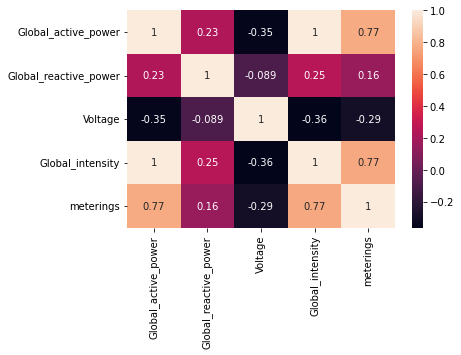

In [12]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

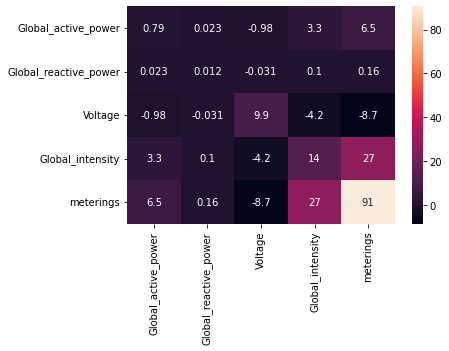

In [13]:
sns.heatmap(data.cov(),annot=True)

In [14]:
x = data.drop(columns=['date_time','meterings'])
y = data['meterings']

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(xtrain)
xscaled = scaler.transform(xtrain)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xscaled, ytrain)
ypred_lin = reg.predict(xtest)

In [25]:
from sklearn.metrics import mean_absolute_error as mae
mae(ytest,ypred_lin)

162.060868170606

In [28]:
reg.score(xscaled,ytrain)

0.6104325031262091

In [31]:
from sklearn.ensemble import BaggingRegressor
bagg_reg = BaggingRegressor(n_estimators=10, random_state=42).fit(xscaled,ytrain)
ypred_bagg = bgg_reg.predict(xtest)
bagg_reg.score(xscaled,ytrain)
mae(ytest,ypred_bagg)

13.228310185185185

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42).fit(xscaled,ytrain)
ypred_dt = dt_reg.predict(xtest)
dt_reg.score(xscaled,ytrain)
mae(ytest,ypred_dt)

8.358564814814814

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42).fit(xscaled,ytrain)
ypred_rf = rf_reg.predict(xtest)
dt_reg.score(xscaled,ytrain)
mae(ytest,ypred_rf)

11.323377314814817

In [34]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('lr', reg), ('rf', bagg_reg), ('r3', dt_reg), ('r4', rf_reg)])
vr.fit(xscaled, ytrain)
ypred_vr = vr.predict(xtest)
print(vr.score(xscaled,ytrain))
print(mae(ytest,ypred_vr))

0.938718800534948
34.64715859357744
